
# CSCI 2000U - Scientific Data Analysis

Projet Group 5:

Aanisha Newaz (100788588)
Japnit Ahuja (100790042) 
Islam Nuryyev(100778667) 
Jessica Patel (100785837) 

<b>Final Project: Proposal
    
<b>Goals:  
1.    Choose a dataset of interest
2.    Report on the dataset’s potential for data analysis
3.    List of initial research questions related to the dataset.

<b> Chosen Dataset:
    https://www.kaggle.com/mylesoneill/world-university-rankings

Name of dataset: World University Rankings

The World University Rankings dataset collected by Myles O'Neill on www.kaggle.com is a dataset of ranked universities done by three different ranking institutes. For our analysis, we will be using the Center for World University Rankings (https://cwur.org/) dataset. This ranking list launched in 2012 in Saudi Arabia. 

The ranking list was formed from various different sources, including the Science Citation Index Expanded, Social Sciences Citation Index, and the Arts & Humanities Citation Index. These indexes were used to help sort universities based on different attributes.

This dataset has upto fourteen attributes to help determing the chosen ranking for each universities:

    1. World ranking
        World ranking for universities in order from year 2012 - 2015        
    2. Institution
        Name of institutions
    3. Country
        Country of institutions's location
    4. National ranking
        Institution's ranking within it's country of origin
    5. Quality of education
        Rank for quality of education
    6. Alumni employment
        Rank for alumni employment
    7. Quality of faculty
        Rank for quality of faculty
    8. Publications
        Rank for publications
    9. Influence
        Rank for influence
    10. Citations
        Number of students at the university
    11. Broad impact
        Rank for broad impact
    12. Patents
        Rank for patents
    13. Score
        Total score that's used for determining world rank of institution
    14. Year
        Year of ranking (2012 - 2015)

In [1]:
#importing used libraries
import csv
import re
import math
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv():
    collection = []
    with open('cwurData.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()

### Get to know your data 


1. How many universities in the world were ranked? 
2. What do the top 3 universities' data look like? Display the top 3 universities.
3. How many different countries are ranked? 
4. Which country appears most often on the list? 
5. What is the range of the total scores?
6. Number of universities ranked each year
7. Basic statistics chart 
8. Graph pf the number of times each country been ranked over the 4 years 
9. Graph of the top three countries total count over the years
10. Correlation chart 
11. Correlation heatmap


In [2]:
#1. How many universities in the world were ranked?
institutions = [x['institution'] for x in data]
print("Number of unique universities:",len(np.unique(institutions)))

Number of unique universities: 1024


In [3]:
#2. What do the top 3 universities data look like? Display the top 3 universities.
data[:3]

[{'world_rank': '1',
  'institution': 'Harvard University',
  'country': 'USA',
  'national_rank': '1',
  'quality_of_education': '7',
  'alumni_employment': '9',
  'quality_of_faculty': '1',
  'publications': '1',
  'influence': '1',
  'citations': '1',
  'broad_impact': '',
  'patents': '5',
  'score': '100',
  'year': '2012'},
 {'world_rank': '2',
  'institution': 'Massachusetts Institute of Technology',
  'country': 'USA',
  'national_rank': '2',
  'quality_of_education': '9',
  'alumni_employment': '17',
  'quality_of_faculty': '3',
  'publications': '12',
  'influence': '4',
  'citations': '4',
  'broad_impact': '',
  'patents': '1',
  'score': '91.67',
  'year': '2012'},
 {'world_rank': '3',
  'institution': 'Stanford University',
  'country': 'USA',
  'national_rank': '3',
  'quality_of_education': '17',
  'alumni_employment': '11',
  'quality_of_faculty': '5',
  'publications': '4',
  'influence': '2',
  'citations': '2',
  'broad_impact': '',
  'patents': '15',
  'score': '89

In [4]:
#3. How many different counries are ranked? 
countries = [x['country'] for x in data]
countries = np.unique(countries)
print(countries,'\n',len(countries), 'different countries ranked')

['Argentina' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'Chile' 'China' 'Colombia' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Egypt' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong'
 'Hungary' 'Iceland' 'India' 'Iran' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Lebanon' 'Lithuania' 'Malaysia' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Poland' 'Portugal' 'Puerto Rico' 'Romania' 'Russia'
 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovak Republic' 'Slovenia'
 'South Africa' 'South Korea' 'Spain' 'Sweden' 'Switzerland' 'Taiwan'
 'Thailand' 'Turkey' 'USA' 'Uganda' 'United Arab Emirates'
 'United Kingdom' 'Uruguay'] 
 59 different countries ranked


In [5]:
#4. Which country appears most often on the list? 
countries_count = {}
for country in [x['country'] for x in data]:
    try:
        countries_count[country] += 1
    except:
        countries_count[country] = 0
sorted(countries_count.items(), key= lambda country: country[1])
print(countries_count)

{'USA': 572, 'United Kingdom': 143, 'Japan': 158, 'Switzerland': 25, 'Israel': 21, 'Canada': 71, 'France': 108, 'Sweden': 23, 'South Korea': 71, 'Italy': 95, 'Germany': 114, 'Netherlands': 28, 'Finland': 19, 'Norway': 11, 'Australia': 57, 'Denmark': 11, 'Singapore': 4, 'Russia': 8, 'China': 166, 'Taiwan': 45, 'Belgium': 19, 'South Africa': 9, 'Spain': 80, 'Brazil': 35, 'Hong Kong': 11, 'Ireland': 15, 'Austria': 23, 'New Zealand': 11, 'Portugal': 13, 'Thailand': 5, 'Czech Republic': 9, 'Malaysia': 5, 'India': 30, 'Greece': 13, 'Mexico': 3, 'Hungary': 11, 'Argentina': 6, 'Turkey': 19, 'Poland': 17, 'Saudi Arabia': 7, 'Chile': 7, 'Iceland': 1, 'Slovenia': 3, 'Estonia': 1, 'Lebanon': 1, 'Croatia': 1, 'Colombia': 3, 'Slovak Republic': 1, 'Iran': 15, 'Egypt': 7, 'Serbia': 1, 'Bulgaria': 1, 'Lithuania': 1, 'Uganda': 1, 'United Arab Emirates': 1, 'Uruguay': 1, 'Cyprus': 1, 'Romania': 2, 'Puerto Rico': 1}


In [6]:
#5. What is the range of the total scores?
total_scores = [float(x['score']) for x in data]
print("Range of total scores is:", min(total_scores), "-", max(total_scores))

Range of total scores is: 43.36 - 100.0


In [7]:
#6. Number of universities ranked each year
year_wise_uni_count = {}
for uni in [x for x in data]:
    try:
        year_wise_uni_count[uni['year']].append(uni['institution'])
    except:
        year_wise_uni_count[uni['year']] = [uni['institution']]

print("year - no. of universities")
for i in year_wise_uni_count:
    print(i, "-", len(np.unique(year_wise_uni_count[i])))

year - no. of universities
2012 - 100
2013 - 100
2014 - 1000
2015 - 1000


In [8]:
#7. Basic statistics chart 
df = pd.read_csv('cwurData.csv')
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


Text(0.5, 1.0, 'Count of Countries')

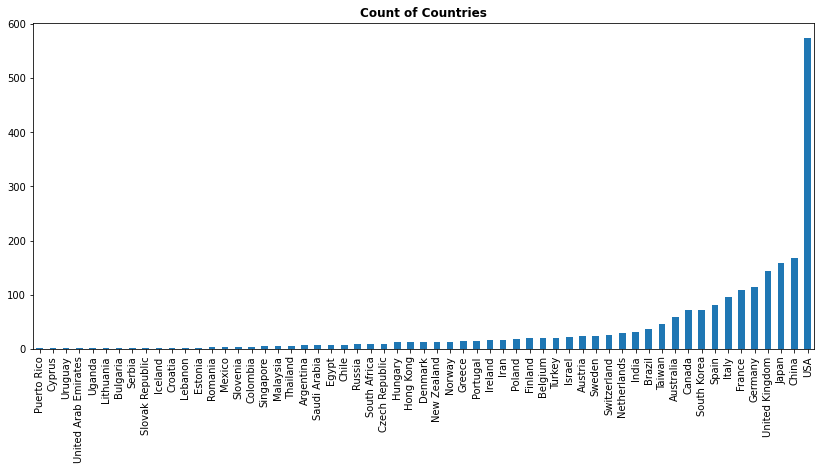

In [89]:
#8. Graph pf the number of times each country been ranked over the 4 years 
#country count over 4 years 
country_count = df['country'].value_counts(ascending = True)
country_count.plot(kind='bar', figsize=(14,6), x="country")
plt.title('Count of Countries', weight = 'bold', size = 12)

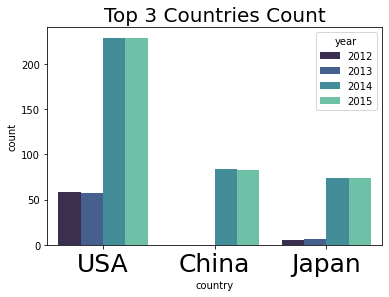

In [10]:
#9. Graph of the top three countries total count over the years
top_3 = ['USA','China','Japan']
sns.countplot(x="country", data=df, order=top_3, hue = df['year'], palette='mako')
plt.xticks(size=25, rotation=0)
plt.title("Top 3 Countries Count",fontsize=20)
plt.show()

In [11]:
#10. Correlation chart 
correlations = df.corr()
correlations

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.942998,0.698214,-0.549098,0.320844
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.173043,0.159440,-0.199756,0.102951
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.521615,0.528120,-0.600541,0.427732
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.423619,0.528219,-0.510374,0.427710
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.549345,0.555107,-0.693540,0.484788
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.917878,0.671558,-0.522111,0.318245
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.916040,0.611811,-0.522837,0.318298
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.852638,0.598728,-0.522438,0.328771
broad_impact,0.942998,0.173043,0.521615,0.423619,0.549345,0.917878,0.916040,0.852638,1.000000,0.562861,-0.531590,-0.000124
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.562861,1.000000,-0.474810,0.368570


Text(0.5, 1.0, 'Correlation Heatmap')

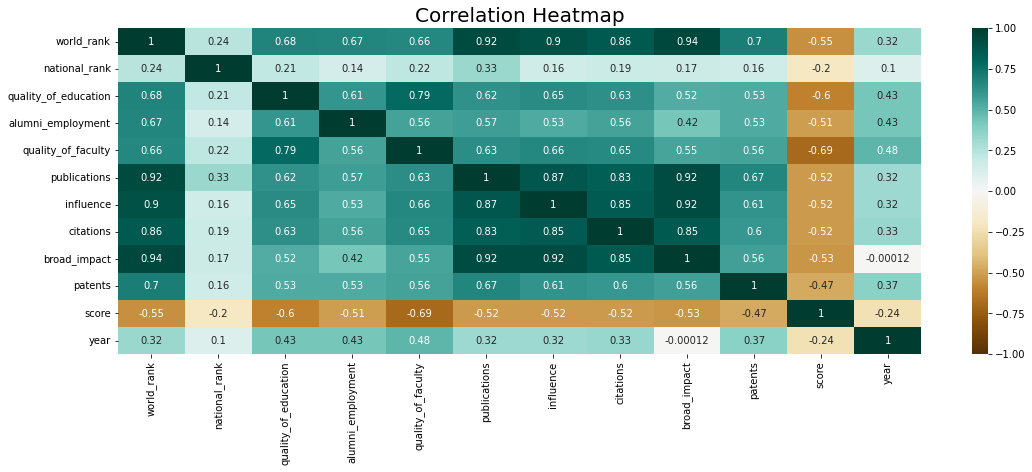

In [12]:
#11. Correlation Heatmap
plt.figure(figsize=(18, 6))
heatmap = sns.heatmap(correlations, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize': 20})

### Why did you choose this dataset over others? 

Having to choose a university after high school is difficult for most students because of the many options available. Everyone wants to get into the best universities in their country or the best countries in the world. The dataset World University Ranking helps us see what factors have the most impact on the university’s ranking which will help us in our future decision making when choosing a university for masters or PhD. It also allows us to see the quality of education and the influence of the institution overall. 

### Was there any other dataset you also found interesting?

We found many datasets but some were particularly eye-catching and intriguing. A dataset called Data Science and Stem salaries was one that we found interesting as it pertains to our field. Another interesting dataset was Factors Affecting Campus Placement. As university students it is important to know what factors affect our campus placement. However we chose the World University Ranking dataset as it also had missing values in its data and we think it will be interesting to deal with missing data in our preprocessing. 

### What are the data analysis questions you want to use this dataset for?

1. What effect does national rank have on the world ranking?  
2. What impact does quality of education have on publications and patents?
3. What attribute has the greatest effect/best relation with world ranking?
4. Are there certain attributes or qualities of an institution that have a greater impact on it’s ranking based on the year it was conducted (2012 - 2015)?
5. Are there different countries that value different qualities more in an institution? What countries (if any) do not align with the world wide trend in terms of the desired qualities?

### What methods do you expect to apply when you process the data to answer these questions?

- Have side by side comparison of each variable
- Find the Pearson correlation coefficient between institutes and different attributes to investigate the nature and strength of their relation
- Plot the attributes using a scatter plot to study the relationship using matplotlib in python
- calculate and plot the least squares best fit line to approximate the relationship

### Do you see any potential for data science applications using this data?Examples: models for prediction, recommendation, data visualization, etc

We can use this data to recommend a university based on the most important criteria for the prospective students. A student might be looking to find a university with the best rank for quality of education and publication or a student maybe looking to find a university with the best alumni employment. Thus, this data could be used to make recommendations to students based on different criteria. 

Universities also can use this dataset as a guideline to increase their ranks and the aspects they need to improve.This data could also be converted to a machine learning model for the prediction of the rank based on its attributes.Thus, an institute could get an approximate value of their ranking compared to others based on the previous trends.

## Part 1. What effect does national rank have on the world ranking?

## Part 2. What impact does quality of education have on publications and patents?

### According on the correlation heat map, the correlation between quality of education and publications is 0.62. To verify, we will compute it manually.

In [16]:
n = df.quality_of_education.count()  #number of elemnts in one row

#computing Sxx (Sxx=∑x^2−(∑x)^2/n)
sum_QoE = df.quality_of_education.sum()  
df['squared_QOE']=df['quality_of_education']**2
squared_sum_QOE = df.squared_QOE.sum()
sxx = (squared_sum_QOE - ((sum_QoE *sum_QoE )/n))

#computing Syy (Syy=∑y^2−(∑y)^2/n)
sum_pb = df.publications.sum()
df['squared_pb']=df['publications']**2
squared_sum_pb = df.squared_pb.sum()
syy = (squared_sum_pb - ((sum_pb *sum_pb)/n))

#computing Sxy Sxy=∑xy−(∑x∑y/n)
pb_and_QoE = df["pb_and_QoE"] = df["quality_of_education"] * df["publications"]
pb_and_QoE_sum = pb_and_QoE.sum()
sxy = (pb_and_QoE_sum - ((sum_QoE*sum_pb)/n))

#Pearson’s sample correlation r is given by  Sxy/(√sxx)*(√syy)
pearson_coefficient = sxy/((math.sqrt(sxx))*(math.sqrt(syy)))
np.around(pearson_coefficient,3)
#0.625

0.625

### Based on our calculations, the correlation between the quality of education and publications is 0.625, which is reflected onto the correlation heat map. Since Pearson’s Correlation Coefficient (r) is between 0.5 and 0.8 it means that the quality of education and publications have a positive moderate relationship. A positive correlation between quality of education and publications does not necessarily imply a cause and effect relationship.

### We will also compute the correlation between the quality of education and patents:

In [17]:
#computing Syy (Syy=∑y^2−(∑y)^2/n)
sum_pt = df.patents.sum()
df['squared_pt']=df['patents']**2
squared_sum_pt = df.squared_pt.sum()
syy2 = (squared_sum_pt - ((sum_pt *sum_pt )/n))

#computing Sxy Sxy=∑xy−(∑x∑y/n)
pt_and_QoE = df["pt_and_QoE"] = df["quality_of_education"] * df["patents"]
pt_and_QoE_sum = pt_and_QoE.sum()
sxy2 = (pt_and_QoE_sum - ((sum_QoE*sum_pt)/n))

#Pearson’s sample correlation r is given by  Sxy/(√sxx)*(√syy)
pearson_coefficient2 = sxy2/((math.sqrt(sxx))*(math.sqrt(syy2)))
np.around(pearson_coefficient2,3)
#0.528

0.528

### Based on our calculations, the correlation between the quality of education and publications is 0.528, which also reflects onto our correlation heat map. Since Pearson’s Correlation Coefficient (r) is between 0.5 and 0.8 it means that the quality of education and patents have a positive moderate relationship. A positive correlation between quality of education and patents does not necessarily imply a cause and effect relationship. However this relationship is weaker than the relationship between quality of education and publications.

### According to our results, both attributes have a positive moderate relationship.

## Part 3: What attribute has the greatest effect/best relation with world ranking?

### To answer this, we will create a catplot for the World Rank's correlation to each attribute. We will use the following steps:

### 1. Get the list of the attributes and its correlation to 'world_rank'. We will sort the list in ascending order:

In [167]:
world_rank_relations = correlations['world_rank']
world_rank_relations.sort_values(ascending=True)

score                  -0.549098
national_rank           0.238553
year                    0.320844
quality_of_faculty      0.663864
alumni_employment       0.668529
quality_of_education    0.676166
patents                 0.698214
citations               0.856573
influence               0.895871
publications            0.923037
broad_impact            0.942998
world_rank              1.000000
Name: world_rank, dtype: float64

### 2. Using the sorted list, a new list will be made for labelling the x-axis of our catplot. This will be done so our plot can be in ascending order to help furthur visualize the correlation:

In [160]:
list_of_new_labels = ['score','national_rank','year','quality_of_faculty','alumni_employment','quality_of_education','patents','citations','influence','publications','broad_impact','world_rank']

### 3. A seaborn catplot will be constructed using the data from dataframe "correlations" and only use the "world_rank"s correlation data. 

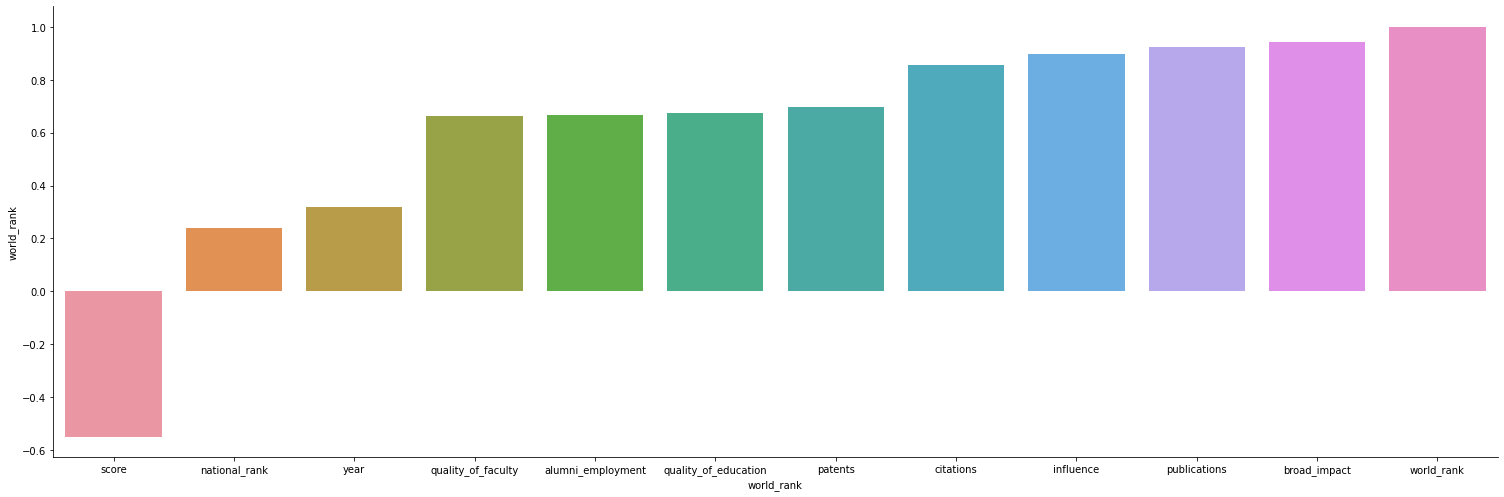

In [159]:
axes = sns.catplot(data=correlations, kind="bar", x='world_rank', y= 'world_rank',height=7, aspect = 3)
axes.set_xticklabels(list_of_new_labels)

### According to the catplot, the attribute that has the greatest affect/relationship with the world rank are broad impact (correlation coefficience (r) of 0.942998), publications (r = 0.923037), influence (r = 0.895871), and citations (r = 0.856573). These top four attributes have a strong positive correlation to the world ranking of universities.